# Lecture 13 - More on Functions

## Overview, Objectives, and Key Terms
 
In [Lecture 12](ME400_Lecture_12.ipynb), the basics of defining functions were presented.  In this lecture, more advanced features of function definitions are presented, including the use of the special `*arg` and `**kwarg` structures.  In addition, anonymous `lambda` functions are presented for quick, in-line applications.  Finally, some interesting (and possibly suprising) applications of functions are considered, which include use of functions as arguments to other functions and the use of functions that call themselves (i.e., *recursion*). 

Note that much of the content of this lecture is focused primarily on features of functions specific to Python that provide a lot of flexibility.  For many students, these features are likely not needed for routine programming, but an awareness of these features is useful when understanding the code of others.

### Objectives

By the end of this lesson, you should be able to

- Define a function using `*args` and `**kwargs`.
- Define a `lambda` function.
- Define a recursive function.


### Key Terms

- `*args`
- `**kwargs`
- anonymous function
- `lambda`
- `filter`
- recursion
- recursive function
- recursive sequence

## `*args` and `**kwargs`

What on earth are `*args` and `**kwargs`?  Before moving along, let's look at a function introduced back in [Lecture 3](ME400_Lecture_3.ipynb): `plt.plot`.  If you forgot how to use it, just use `help`:

In [1]:
import matplotlib.pyplot as plt
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

Wait, consider the line `plot(*args, **kwargs)`.  Those arguments do not look like `(x, y)` or `(x, y, x, z)` or `(x, y, 'k-', x, z, 'r--')`, similar to what we've previously used.  Indeed, `*args` and `**kwargs` represent two different ways to pass arguments.  

In [Lecture 12](ME400_Lecture_12.ipynb), functions were defined with a pretty specific structure, e.g., 
```python
    def some_function(arg1, arg2 = default2, arg3 = default3):
        # do stuff and maybe return a value 
        # (but don't have only a comments like these!)
```
Such a function has arguments explicitly listed, and sometimes, they are given default values.  

For a function like `plt.plot`, something else is happening, and the arguments that we pass (like `x` and `y`) are somehow being passed in `*args*` or `**kwargs`.  Perhaps, before explaining the details, it is worth considering an example.  First, define the following three functions:

In [2]:
def foo(*args) :
    print(args)

def goo(**kwargs) :
    print(kwargs)
    
def hoo(a, b, c) :
    print(a, b, c)

Now, let's call `foo` with the three arguments 1, 2, and 3:

In [3]:
foo(1, 2, 3)

(1, 2, 3)


That output looks like like a `tuple` containing the values provided as individual arguments.  Moreover, the order of the values in the `tuple` is the same as the order in which they were passed.

> **Exercise**: Modify `foo` with a second `print` statement to verify that the type of `args` is, in fact, a `tuple`.

Out of curiosity, what if we pass just one value to `foo`?  Or two?

In [4]:
foo(1)

(1,)


In [5]:
foo(1, 2)

(1, 2)


The observation is the same: a `tuple` whose values are the arguments given.

Now, let's try the same with `goo`:

In [6]:
goo(1, 2, 3)

TypeError: goo() takes 0 positional arguments but 3 were given

Interesting.  The error indicates that `**kwargs` is different from `*args`.  What does the error mean, though? 

When we pass an argument to a function without naming it, the argument is called a **positional argument**.  In other words, Python assigns the value to the appropriate name based on the position of the value relative to the other arguments.  For example, Python knows that when one calls `hoo(1, 2, 3)` the value `1` should be assigned to `a` because `1` is the first values passed, and `a` is the first argument named in the `def` statement.

If an argument is not **positional**, then it is a **keyword argument**.  As seen in [Lecture 12](ME400_Lecture_12.ipynb), keyword arguments are named arguments.  The error suggests that `goo` requires *only* keyword arguments, so let's try the following:

In [7]:
goo(a=1, b=2, c=3)

{'a': 1, 'b': 2, 'c': 3}


That worked, and the output suggests that `kwargs` is a `dict` whose keys and values are the names and values of the arguments given as input.

> **Exercise**: Modify `goo` with a second `print` statement to verify that the type of `kwargs` is, in fact, a `dict`.

Take a moment to consider what `*args` and `**kwargs` let one do.  A function whose argument is `*args` can be passed *any number of positional arguments*.  Maybe these arguments look like `(x, x**2, 'r--', x, x**3, x, x**4, 'bx')`, like those used for `plt.plot`.

Likewise, a function whose argument is `**kwargs` can be passed *any number of keywork (i.e., named) arguments*.  Maybe these arguments look like `(lw=2, color='black', label = 'line 1')`, which are common options used for `plt.plot`.

To make these examples concrete, consider the following:

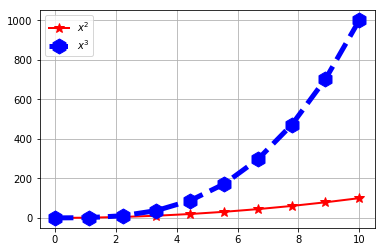

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 10)
#       <positional args> <keyword args>
plt.plot(x, x**2,  '-*',   color='red', linewidth=2, label='$x^2$', markersize=10)
plt.plot(x, x**3, '--h',   color='blue', linewidth=5, label='$x^3$', markersize=15)
plt.legend() # automatically uses the labels
plt.grid(True)
plt.show()

In summary, `*args` and `**kwargs` are extremely powerful constructs, and when used together, let one write functions that can handle an arbitrary number of arguments.  You'll probably encounter these constructs most often when inspecting functions defined in modules like `matplotlib.pyplot`, so knowing what they are and how to use them can be very useful when learning to use such functions.

> **Exercise**:  Define a function `ideal_gas(**kwargs)` that implements the ideal gas law $PV = nRT$.  Specifically, a user should enters just three of the four physical quantities $P$, $V$, $n$, and $T$, and the fourth should be computed.  Assume that $R = 8.314$ J/K mol.  In addition to applying the `**kwargs` construct, this exercise flexes what you remember about `if` statements and the `dict` type.

> **Exercise**: Define a function `are_they_bool(*args)` that returns a `list` whose length is equal to the number of arguments passed.  The `i`th element of this `list` is `True` if the `i`th argument is (logically equal to) `True` and is otherwise `False`.

## Anonymous Functions

So far, functions have been defined by a `def` statement.  However, that's not the only way to define functions in Python, and for some applications, a shorter (if not simpler) approach is useful.

### A simple `lambda`

To get the syntax down, consider first a function to square a number.  We could define that using `def` as

In [9]:
def square_it(x):
    return x*x
square_it(2)

4

The same functionality can be defined using

In [10]:
square_it_lambda = lambda x: x**2
square_it_lambda(2)

4

The syntax for anonymous functions starts with the keyword `lambda`, followed by one or more argument names, a colon `:`, and the expression to be returned.  Why are such functions called anonymous functions?  *Because they have no real name*:

In [11]:
print(square_it)
print(square_it_lambda)

<function square_it at 0x118ce4400>
<function <lambda> at 0x118cdc9d8>


In practice, `lambda` functions are the only way to define a function as part of a single expression.  For example, one can do the following:

In [12]:
(lambda x: x**2)(2)

4

This is strange syntax, for sure, but once `(lambda x: x**2)` is recognized as a *callable* function, the syntax is a bit clearer.  The important point, though, is that `lambda` functions can be part of expressions, and expression include function calls.

### When `lambda` is more natural

A richer example, of course, helps motivate the utility of `lambda`.  Consider the built-in `filter` function:

In [13]:
help(filter)

Help on class filter in module builtins:

class filter(object)
 |  filter(function or None, iterable) --> filter object
 |  
 |  Return an iterator yielding those items of iterable for which function(item)
 |  is true. If function is None, return the items that are true.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



If you wade through all that output, notice this line:

```
Return an iterator yielding those items of iterable for which function(item)
is true. If function is None, return the items that are true.
```

Don't worry about what an *iterator* is; like `range()` and `dict.keys()`, it can be converted into a `list`.  The important point is that `filter` applies a filtering `function` to all the items of a sequence and returns only those elements that pass the filter.  Such filtering has *lots* of applications, which is why the functionality is built into Python.  The problem is that each application requires different filtering functions.

Consider a class with lots of students and lots of assignments (and assignment categories).  A common task (or it should be anyway) for an instructor is to check how performance in one category impacts performance in another category.  For example, can a student do very well on homework but do very badly on the exam?  Lots of conclusions can be made if only this question could be answered, and it can be answered using, of course, `filter`.  For concreteness, consider the following category scores (and some notes) for several students:

In [14]:
records = [
    {'name': 'John von Neumann', 'hw': 68.0, 'labs': 94.3, 'quiz': 100.0, 'exam': 98.5, 'notes': 'Invented merge sort.'},
    {'name': 'Alan Turing', 'hw': 90.5, 'labs': 33.3, 'quiz': 91.0, 'exam': 69.5, 'notes': 'Developed the "Turing Test" for AI.'},
    {'name': 'Ada Lovelace', 'hw': 94.0, 'labs': 88.0, 'quiz': 94.0, 'exam': 100.0, 'notes': 'First computer programmer.'},
    {'name': 'Donald Knuth', 'hw': 72.0, 'labs': 98.0, 'quiz': 74.0, 'exam': 79.0, 'notes': 'Invented TeX.'},
    {'name': 'Grace Hopper', 'hw': 96.0, 'labs': 56.0, 'quiz': 82.0, 'exam': 83.0, 'notes': 'Popularized machine-independent languages (of which Python is an example)'}
]

This sort of information is exactly the kind an instructor might have from Canvas (or other course-management systems).  Now, the question, who does very well on the homeworks (say, over 90% or an "A") but does *not* do well on exams?  Each item in `records` is itself a `dict`, and we could write the following function to return such an item only if it meets the criteria:

In [15]:
def good_hw_bad_exam(item):
    if item['hw'] >= 90.0 and item['exam'] < 70.0:
        return True
    else:
        pass # i.e., return None (equivalent to False)

In [16]:
list(filter(good_hw_bad_exam, records)) 

[{'exam': 69.5,
  'hw': 90.5,
  'labs': 33.3,
  'name': 'Alan Turing',
  'notes': 'Developed the "Turing Test" for AI.',
  'quiz': 91.0}]

Ah, our friend Alan Turing meets the criteria.  He has done quite well on the homework (an "A"), but his exam score is less than satisfying.  Also worth noting: *we passed a function name as an argument*.  

> **Note**: A function can be passed as an argument to other functions.

Alright, alright, but what about **anonymous functions**?  Let's filter that data for high exam scores and low homework scores (i.e., the lazy but smart student; yes, they exist).   Although a new `def` statement could be written, a much faster approach is `lambda`:

In [17]:
list(filter(lambda item: item['exam'] >= 90 and item['hw'] < 70, records))

[{'exam': 98.5,
  'hw': 68.0,
  'labs': 94.3,
  'name': 'John von Neumann',
  'notes': 'Invented merge sort.',
  'quiz': 100.0}]

Hence, the full `lambda` function accepts the argument `item` and returns `True` if it passes the filter.  The reason `lambda` is useful here is because the filtering criteria can be changed on the fly.  For example, one could check for several different patterns:

In [18]:
# shows up for labs, but not as much for exams
list(filter(lambda item: item['labs'] >= 90 and item['exam'] < 80, records))

[{'exam': 79.0,
  'hw': 72.0,
  'labs': 98.0,
  'name': 'Donald Knuth',
  'notes': 'Invented TeX.',
  'quiz': 74.0}]

In [19]:
# wows on the quizzes, but not on exams
list(filter(lambda item: item['quiz'] >= 90 and item['exam'] < 80, records))

[{'exam': 69.5,
  'hw': 90.5,
  'labs': 33.3,
  'name': 'Alan Turing',
  'notes': 'Developed the "Turing Test" for AI.',
  'quiz': 91.0}]

Hence, rather than defining new functions using `def`, one can simply define a `lambda` when needed as part of one expression.

> **Exercise**: Define a `lambda` function that doubles a values.

> **Exercise**: Define a `lambda` function that adds two values.

>> *Solution*: `lambda x, y: x + y`

> **Exercise**: The function `map` is called as `map(func, seq)`, where `func` is a function to apply to each element of a sequence `seq`.  By using `list(map(func, seq))`, one gets a list of the values `func(seq[i])`.  Use `map` and a `lambda` function to produce a list of `True` or `False` indicating whether the elements of a list of integers is even or odd.

>> *Solution*: `list(map(lambda x: x % 2 == 0, [1, 2, 3, 4]))`.

## Recursive Functions

The topic of **recursion** is included here almost entirely for the sake of completion.  Before we dive into what recursion is, note that in much of scientific computing, recursion can be replaced by appropriate loops.

> **Note**:  Recursion can often be replaced by loops.

Now, **recursion** is a process in which output (say, a particular value) is computed at any particular step using the output from one or more previous steps using a fixed relationship.  If this output is a single value, then the process yields an $m$-term, **recursive sequence** of the form $a_n = f(a_{n-1}, a_{n-2}, \ldots, a_{n-m}$.  Here, $f$ is an arbitrary function of the past $m$ values in the sequence.

The basic structure of a **recursive function** can be illustrated by the following function:

In [20]:
def a_basic_recursive_function(n):
    """This function does something simple, but it
       might not be immediately obvious."""
    if n == 1:
        return 1
    else:
        return n + a_basic_recursive_function(n-1)

In [21]:
for n in range(1, 6):
    print("For n={}, the function returns {}".format(n, a_basic_recursive_function(n)))

For n=1, the function returns 1
For n=2, the function returns 3
For n=3, the function returns 6
For n=4, the function returns 10
For n=5, the function returns 15


Do you see the pattern?

> **Exercise**: Before moving on, try to determine what happens in this function by adding a `print` statement after the `else` clause to display the value of `n`.

What function gives 1 when given 1, 3 when given 2, and 6 when given 3?  A function that adds the integers from 1 to $n$, just like we've done before using loops.  The sequence is simple: $a_n = f(a_{n-1}) = a_{n-1} + n$ with $a_0 = 1$.

> **Exercise**: Implement the factorial function using recursion.

> **Exercise**: Use recursion to produce the list `[a, 2, 3, 4, ..., b]` for positive integers `a` and `b`.  You may assume that `b >= a`.

>> *Solution*:
>>
```python 
def recursive_range(a, b):
    if a == b:
        return [a]
    else:
        return recursive_range(a, b-1) + [b]
```
> Remember, `[1] + [2]` leads to `[1, 2]`.

A recursive function must always have an effective termination criterion that prevents the function from being called again.  Sometimes this is called a *base case* or a *guard*. For our summation example, that condition is `n == 1`.  When we add the integers from 1 through 5, the recursive function does so like this: $5 + (4 + (3 + (2 + (1))))$, where the parentheses indicate a new call to the recursive function.  Here, these calls terminate at $(1)$.  If we forgot to terminate when `n == 1`, the function would keep calling itself over and over.  It turns out that Python limits the number of times this can happen:

In [22]:
def infinite_recursion(n):
    return n + infinite_recursion(n-1)
print(infinite_recursion(5))

RecursionError: maximum recursion depth exceeded

It's not obvious what this maximum depth (i.e., number of calls) is, but it's probably pretty big.

> **Warning**:  Like loops, recursive functions need a termination criterion.  For recursive sequences, thats usually when the recursion gets to the initial values of the sequence, e.g., $a_0 = 1$ for the sum of the integers from 1 to $n$.

### A Famous Example

Remember the Fibonacci sequence: $1, 1, 2, 3, 5, 8, \ldots$.  It starts with two 1's, but all of the subsequent terms have a special pattern: they are the sum of the two previous terms.  In other words, one can define the Fibbonaci sequence as $a_{n} = a_{n-1} + a_{n-2}$ given $a_0 = a_1 = 1$.  This is a two-term, recursive sequence.  Of course, defining the $n$th term is easy using a simple loop.   Here, that approach is provided as a function:

In [23]:
def fibo_loop(n):
    """Compute the nth term in Fibonacci's sequence using loops."""
    # initialize all three terms a_n, a_{n-1}, and a_{n-2}
    a_n, a_1, a_2 = 1, 1, 1
    # initialize the coutner
    i = 2
    while i <= n:
        # apply the sequence
        a_n = a_1 + a_2
        # and then store the old values
        a_2 = a_1
        a_1 = a_n
        # always increment the counter
        i += 1
    return a_n

In [24]:
fibo_loop(5)

8

The Fibonacci sequence is recursive.  Each term $a_n$ depends on the two previous terms $a_{n-1}$ and $a_{n-2}$.  Hence, the process to compute $a_n$ looks just like the process to compute $a_{n-1}$, all the way down to the first to values $a_0$ and $a_1$.  Consider the case of $n = 5$, for which $a_5$ is 8.  Let's break it down:

$$
\begin{split}
8 &= 3 + 5 \\
  &= (1_1 + 2) + (2 + 3) \\
  &= (1_1 + (1_0 + 1_1)) + ((1_0 + 1_1) + (1_1 + 2))\\
  &= (1_1 + (1_0 + 1_1)) + ((1_0 + 1_1) + (1_1 + (1_0 + 1_1)))\\
\end{split}
$$

Here, the subscripts on the 1's indicate whether they are $a_0$ or $a_1$.  The conclusion is that every single term in the sequence is just a sum of multiple 1's.  If we were to write this using functions, 

```
   8 = fibo(3) + fibo(4)
     = (fibo(1) + fibo(2) + (fibo(2) + fibo(3))
     = (fibo(1) + (fibo(0)+fibo(1))) + ((fibo(0)+fibo(1)) + (fibo(1)+fibo(2)))
     = (fibo(1) + (fibo(0)+fibo(1))) + ((fibo(0)+fibo(1)) + (fibo(1)+(fibo(0)+fibo(1))))
```

What this means is that calling `fibo(3)` ought to return the sum of `fibo(1)` and `fibo(2)`, and that the call `fibo(2)` ought to return the sum of `fibo(0)` and `fibo(1)`.  The only time calling `fibo(n)` doesn't require calling `fibo(n-1)` and `fibo(n-2)` is when `n` is 0 or 1, i.e., when the value to be returned is 1.

Here is this idea packaged into the  **recursive function** `fibo_recursive`:

In [25]:
def fibo_recursive(n):
    if n < 2: # again, we need a termination criterion.
        return 1
    else:
        return fibo_recursive(n-2) + fibo_recursive(n-1)

In [26]:
fibo_recursive(5)

8

Take a moment and process this function.  Test it out (in Spyder or by hand) and verify that it works.

> **Exercise**:  Implement `fibo_recursive` in Spyder. For $n = 5$, use the graphical debugger to trace the output.

> **Exercise**:  Consider two integers $a > 0$ and $b > 0$.  Their [greatest common divisor](https://en.wikipedia.org/wiki/Greatest_common_divisor) (call it $gcd(a, b)$) is the largest integer that divides both of them.  One way to compute $gcd(a, b)$ is the [Euclidean algorithm](https://en.wikipedia.org/wiki/Euclidean_algorithm). Using modular arithmetic, this algorithm can be summarized by the equations $gcd(a, b) = gcd(b, a\,\text{mod}\, b)$ and $gcd(a, 0) = a$. Remember $a\,\text{mod}\, b$ is equivalent to the Python `a % b`.  Use these equations to implement a recursive Python function `gcd(a, b)`.  You can check your answer using `math.gcd`.

## Further Reading

A pretty neat overview of recursion can be found [here](https://medium.freecodecamp.org/how-recursion-works-explained-with-flowcharts-and-a-video-de61f40cb7f9).